# Customer churn analysis

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Devu\Desktop\Harshitha files\Customer churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
#Visualization

<AxesSubplot:xlabel='customerID', ylabel='count'>

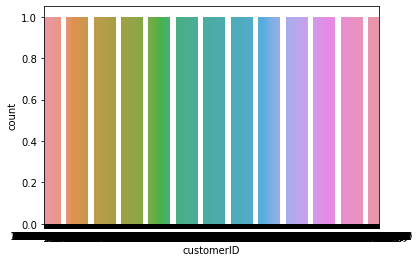

In [10]:
sns.countplot(df['customerID'])

<AxesSubplot:xlabel='gender', ylabel='count'>

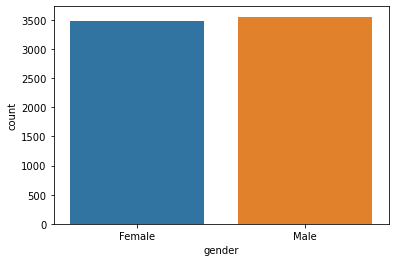

In [11]:
sns.countplot(df['gender'])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

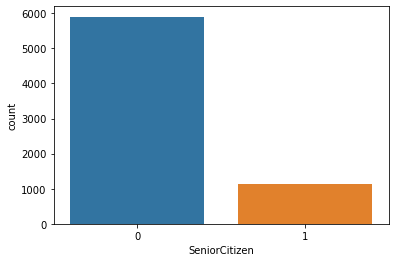

In [12]:
sns.countplot(df['SeniorCitizen'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

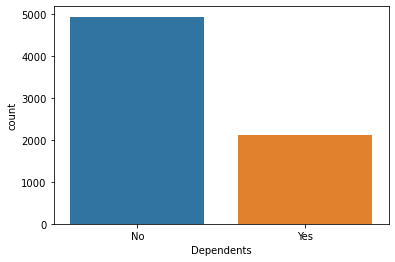

In [13]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Partner', ylabel='count'>

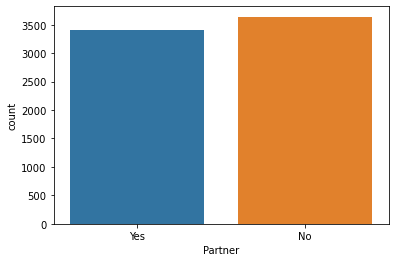

In [14]:
sns.countplot(df['Partner'])

<AxesSubplot:xlabel='Churn', ylabel='count'>

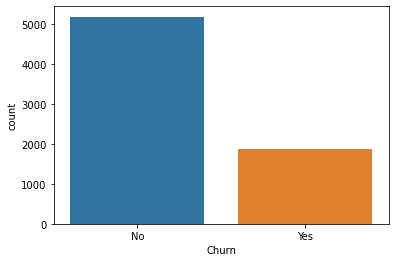

In [15]:
sns.countplot(df['Churn'])

<AxesSubplot:>

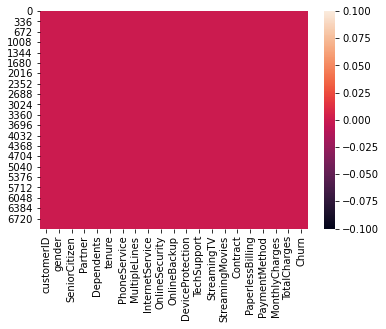

In [16]:
sns.heatmap(df.isnull())

In [17]:
dfcorr=df.corr()

<AxesSubplot:>

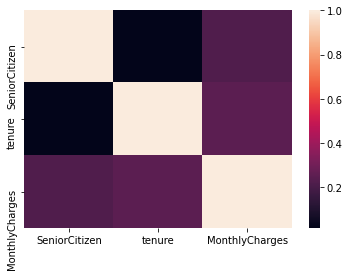

In [18]:
sns.heatmap(dfcorr)

<AxesSubplot:>

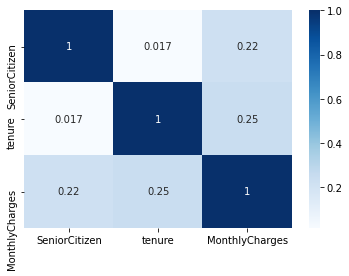

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcorr,cmap='Blues',annot=True)

## Plotting outliers

In [20]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:>

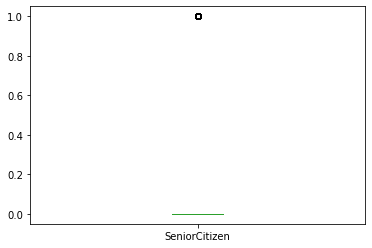

In [21]:
df['SeniorCitizen'].plot.box()

<AxesSubplot:>

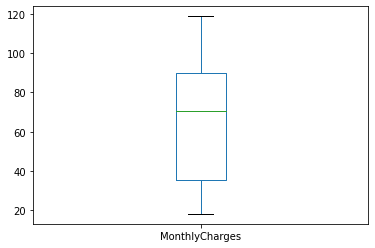

In [22]:
df['MonthlyCharges'].plot.box()

In [23]:
df.shape

(7043, 21)

## Skewness

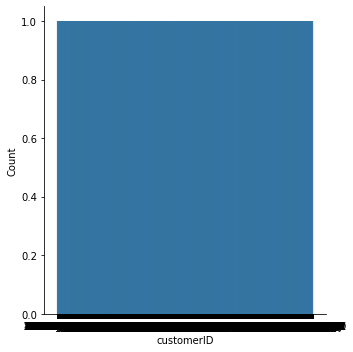

In [24]:
sns.displot(df['customerID'])

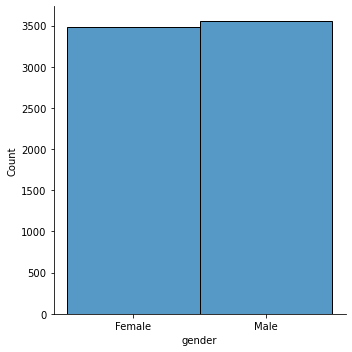

In [25]:
sns.displot(df['gender'])

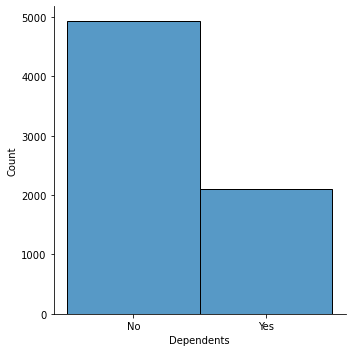

In [26]:
sns.displot(df['Dependents'])

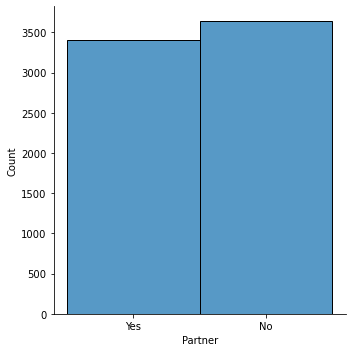

In [27]:
sns.displot(df['Partner'])

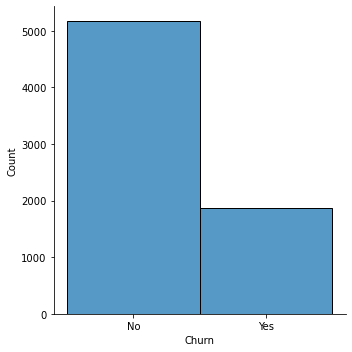

In [28]:
sns.displot(df['Churn'])

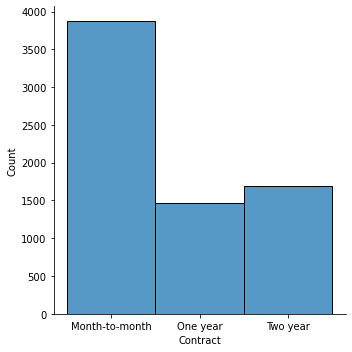

In [29]:
sns.displot(df['Contract'])

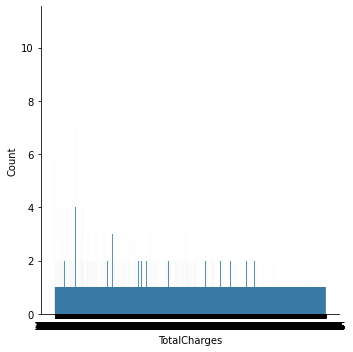

In [30]:
sns.displot(df['TotalCharges'])

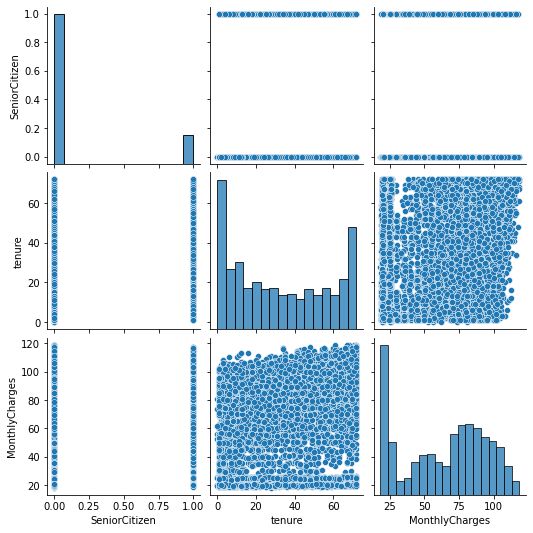

In [31]:
sns.pairplot(df)

In [32]:
df.drop('gender',axis=1,inplace=True)

In [33]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['customerID']=LE.fit_transform(df['customerID'])
df['Partner']=LE.fit_transform(df['Partner'])
df['Dependents']=LE.fit_transform(df['Dependents'])
df['PhoneService']=LE.fit_transform(df['PhoneService'])
df['MultipleLines']=LE.fit_transform(df['MultipleLines'])
df['InternetService']=LE.fit_transform(df['InternetService'])

In [35]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['OnlineBackup']=LE.fit_transform(df['OnlineBackup'])
df['OnlineSecurity']=LE.fit_transform(df['OnlineSecurity'])
df['DeviceProtection']=LE.fit_transform(df['DeviceProtection'])
df['TechSupport']=LE.fit_transform(df['TechSupport'])
df['StreamingTV']=LE.fit_transform(df['StreamingTV'])
df['StreamingMovies']=LE.fit_transform(df['StreamingMovies'])
df['Contract']=LE.fit_transform(df['Contract'])
df['PaperlessBilling']=LE.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=LE.fit_transform(df['PaymentMethod'])
df['MonthlyCharges']=LE.fit_transform(df['MonthlyCharges'])
df['TotalCharges']=LE.fit_transform(df['TotalCharges'])
df['Churn']=LE.fit_transform(df['Churn'])

In [36]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,3962,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,2564,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,5535,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


In [37]:
# Removing outliers

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.91189045, 0.43991649, 1.03453023, ..., 1.13176632, 0.39860759,
        0.60102348],
       [0.21690598, 0.43991649, 0.96662231, ..., 0.38773977, 0.94876238,
        0.60102348],
       [0.47070074, 0.43991649, 0.96662231, ..., 0.51731743, 1.64188328,
        1.66382851],
       ...,
       [0.07574495, 0.43991649, 1.03453023, ..., 1.14221613, 0.13968008,
        0.60102348],
       [1.18683477, 2.27315869, 1.03453023, ..., 0.23297901, 0.31653445,
        1.66382851],
       [0.63694614, 0.43991649, 0.96662231, ..., 1.4723266 , 1.13801338,
        0.60102348]])

In [39]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [40]:
df_new=df[(z<3).all(axis=1)]
df_new

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,2564,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
4,6511,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1
5,6551,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,1274,6104,1
6,1002,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,1075,1550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,52,770,0
7038,4853,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,1597,0
7039,1525,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,5698,0
7041,5934,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,2660,1


In [41]:
df.shape

(7043, 20)

In [42]:
df_new.shape

(6361, 20)

## Standarad scalar

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [44]:
scaledX

array([[ 0.91189045, -0.43991649,  1.03453023, ..., -1.13176632,
        -0.39860759, -0.60102348],
       [ 0.21690598, -0.43991649, -0.96662231, ..., -0.38773977,
        -0.94876238, -0.60102348],
       [-0.47070074, -0.43991649, -0.96662231, ..., -0.51731743,
        -1.64188328,  1.66382851],
       ...,
       [-0.07574495, -0.43991649,  1.03453023, ..., -1.14221613,
        -0.13968008, -0.60102348],
       [ 1.18683477,  2.27315869,  1.03453023, ...,  0.23297901,
        -0.31653445,  1.66382851],
       [-0.63694614, -0.43991649, -0.96662231, ...,  1.4723266 ,
         1.13801338, -0.60102348]])

In [45]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [46]:
Y.explained_variance_ratio_

array([0.18643097, 0.12206922, 0.07486924, 0.06135357, 0.05411513,
       0.05048635, 0.04943388, 0.04363107, 0.04182062, 0.03944868,
       0.03876605, 0.03583391, 0.03523902, 0.03422739, 0.03266412,
       0.02814895, 0.02588264, 0.02312325, 0.01268922, 0.0097667 ])

In [47]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 18.64309656,  30.85001822,  38.33694266,  44.47229977,
        49.88381248,  54.93244756,  59.87583518,  64.23894238,
        68.42100424,  72.36587271,  76.24247759,  79.82586847,
        83.34977084,  86.77251006,  90.03892254,  92.85381761,
        95.44208196,  97.75440726,  99.0233296 , 100.        ])

In [48]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 18


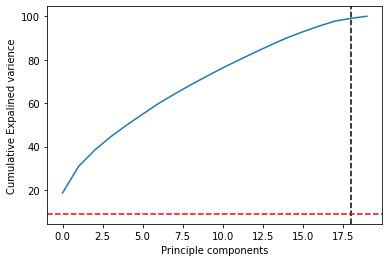

In [49]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

## Missing value

In [50]:
df.isnull().sum()

customerID          0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [51]:
df["Partner"]=df["Partner"].fillna(df["Partner"].mean())
df["tenure"]=df["tenure"].fillna(df["tenure"].median())

## Model Building

In [52]:
x_train=df.drop('Churn',axis=1)
y_train=df.Churn

In [53]:
x_train.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505
1,3962,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466
2,2564,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157
3,5535,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400
4,6511,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925


In [54]:
y_train.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [55]:
x_train.shape

(7043, 19)

In [56]:
y_train.shape

(7043,)

## Classification model

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [58]:
x= df.drop(['Churn'],axis=1)
y=df["Churn"]
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,"at random_state", i)

73.16129032258064 at random_state 0
72.47311827956989 at random_state 1
71.87096774193549 at random_state 2
73.63440860215053 at random_state 3
71.82795698924731 at random_state 4
72.7741935483871 at random_state 5
73.33333333333333 at random_state 6
73.67741935483872 at random_state 7
72.17204301075269 at random_state 8
71.44086021505376 at random_state 9
73.41935483870968 at random_state 10
73.20430107526882 at random_state 11
73.9784946236559 at random_state 12
72.7741935483871 at random_state 13
73.59139784946237 at random_state 14
73.11827956989248 at random_state 15
72.08602150537634 at random_state 16
73.0752688172043 at random_state 17
72.7741935483871 at random_state 18
72.51612903225806 at random_state 19
73.72043010752688 at random_state 20
72.38709677419355 at random_state 21
70.96774193548387 at random_state 22
73.89247311827957 at random_state 23
72.21505376344086 at random_state 24
72.60215053763442 at random_state 25
72.25806451612902 at random_state 26
72.3010752688172

In [60]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=1
print("Best accuracy is",maxAccu," on Random_state",maxRS)

Best accuracy is 0.7581637482252721  on Random_state 1


### Descision Tree Classifier

In [61]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier: \n\n",classification_report(y_test,y_pred_dt))
print("Test Accuracy:{}%".format(round(dt.score(x_test,y_test)*100,2)))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       0.83      0.79      0.81      1555
           1       0.48      0.54      0.51       558

    accuracy                           0.72      2113
   macro avg       0.65      0.66      0.66      2113
weighted avg       0.73      0.72      0.73      2113

Test Accuracy:72.22%


### Logistic Regression

In [62]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier: \n\n",classification_report(y_test,y_pred_lr))
print("Test Accuracy:{}%".format(round(lr.score(x_test,y_test)*100,2)))

Logistic Regression Classifier: 

               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1555
           1       0.64      0.53      0.58       558

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Test Accuracy:79.6%


### K Neighbors Classifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
                                best_score = knn.score(x_train, y_train)
                                best_Kvalue = i
    print("Best KNN Value:{}".format(best_Kvalue )) 
    print("Test Accuarcy:{}".format(round(best_score*100,2)))

Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0


In [64]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print(" KNN Classifier: \n\n",classification_report(y_test,y_pred_knn))
print("Test Accuracy:{}%".format(round(knn.score(x_test,y_test)*100,2)))

 KNN Classifier: 

               precision    recall  f1-score   support

           0       0.79      0.90      0.84      1555
           1       0.53      0.32      0.40       558

    accuracy                           0.75      2113
   macro avg       0.66      0.61      0.62      2113
weighted avg       0.72      0.75      0.72      2113

Test Accuracy:74.54%


### SVC

In [65]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
print(" SVM Classifier: \n\n",classification_report(y_test,y_pred_svm))
print("Test Accuracy:{}%".format(round(svm.score(x_test,y_test)*100,2)))

 SVM Classifier: 

               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1555
           1       0.00      0.00      0.00       558

    accuracy                           0.74      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.74      0.62      2113

Test Accuracy:73.59%


### Gaussian NB

In [66]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
print(" Navie byes Classifier: \n\n",classification_report(y_test,y_pred_nb))
print("Test Accuracy:{}%".format(round(nb.score(x_test,y_test)*100,2)))

 Navie byes Classifier: 

               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1555
           1       0.53      0.74      0.62       558

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.76      0.77      2113

Test Accuracy:75.53%


### Random Forest Classifier

In [67]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print(" Random Forest Classifier: \n\n",classification_report(y_test,y_pred_rf))
print("Test Accuracy:{}%".format(round(rf.score(x_test,y_test)*100,2)))

 Random Forest Classifier: 

               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.64      0.52      0.57       558

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Test Accuracy:79.7%


## Cross validation

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.7261099506419769


In [70]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.7985233926382347


In [71]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.7408767299503193


In [72]:
print(cross_val_score(svm,x,y,cv=5).mean())

0.7346301575908123


In [73]:
print(cross_val_score(nb,x,y,cv=5).mean())

0.756353736531389


In [74]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.789437020130331


In [75]:
# Hyperparameter tuning

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {
    'max_depth':[6,7,8],
    'max_features':['auto','sqrt'],
    'n_estimators':[200,300],
    'criterion' :['gini','entropy']
}

In [78]:
rf = RandomForestClassifier()

In [79]:
rf_cv = GridSearchCV(rf, param_grid, cv=5)

In [80]:
rf_cv.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300]})

## AUC ROC curve

In [81]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [82]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
y_pred_prob = rf.predict_proba(x_test)[:,1]
y_pred_prob

array([0.  , 0.02, 0.81, ..., 0.08, 0.14, 0.67])

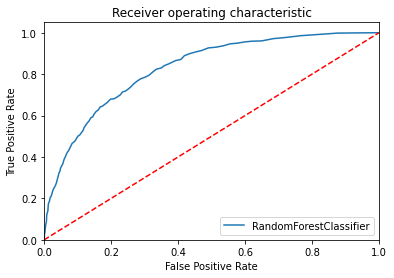

In [83]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
fpr,tpr,thersholds = roc_curve(y_test,rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='RandomForestClassifier'%rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [84]:
Final_mod = RandomForestClassifier()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

79.17652626597254


## Saving the model

In [85]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']